In [1]:
import pandas as pd
import datetime
from dateutil.relativedelta import relativedelta
import FinanceDataReader as fdr
import numpy as np
import re
from marcap import marcap_data

# ETF List 및 Corr

In [9]:
# ETF List 만들기
df_etf=fdr.EtfListing('KR')
etf_list = df_etf['Symbol'].to_list()
etf_trade_list=[]
# fdr.DataReader(etf_list[0])['Close'][-1]
for i in range(len(etf_list)):
    close = fdr.DataReader(etf_list[i],'2020-10-01')['Close'][-1]
    volume = fdr.DataReader(etf_list[i],'2020-10-01')['Volume'][-1] 
    if int(close) * int(volume) > 1000000000:
        etf_trade_list.append(etf_list[i])
    else:
        continue
etf_trade_list

['069500',
 '102110',
 '122630',
 '252670',
 '153130',
 '114800',
 '278530',
 '233740',
 '148020',
 '214980',
 '278540',
 '105190',
 '310970',
 '261220',
 '251340',
 '133690',
 '229200',
 '305720',
 '305540',
 '204480',
 '192090',
 '132030',
 '314250',
 '275980',
 '144600',
 '196230',
 '130680',
 '252710',
 '143850',
 '267770',
 '233160',
 '364980',
 '130730',
 '252420',
 '364960',
 '123320',
 '174360',
 '310080',
 '239660',
 '365000',
 '364970']

In [19]:
# ETF에서 상관계수 구하기
df_etf_corr=pd.DataFrame()
# df_etf_corr[]
for i in etf_trade_list:
    df_temp = fdr.DataReader(i,'2020-01-01')['Close'].to_frame()
    df_temp.columns = [i]
    df_etf_corr = pd.concat([df_etf_corr,df_temp],axis=1)
df_etf_corr.corr(method='pearson')

,069500,102110,122630,252670,153130,114800,278530,233740,148020,214980,...,364980,130730,252420,364960,123320,174360,310080,239660,365000,364970
069500,1.000000,0.999980,0.978511,-0.927404,0.266026,-0.964096,0.999903,0.865723,0.999965,0.363903,...,0.137510,0.306618,-0.925117,-0.162179,0.982330,0.772355,0.906378,0.382781,-0.489900,0.919258
102110,0.999980,1.000000,0.978243,-0.927910,0.267057,-0.964440,0.999907,0.866299,0.999968,0.364803,...,0.209997,0.307569,-0.925643,-0.089155,0.982102,0.772804,0.906730,0.383410,-0.424446,0.945724
122630,0.978511,0.978243,1.000000,-0.838488,0.069015,-0.892246,0.979644,0.754677,0.978955,0.173121,...,0.260954,0.112059,-0.835194,-0.036827,0.999723,0.681237,0.832683,0.197257,-0.376404,0.961457
252670,-0.927404,-0.927910,-0.838488,1.000000,-0.523898,0.992800,-0.925926,-0.931781,-0.927165,-0.597526,...,-0.396185,-0.554349,0.999899,-0.106311,-0.847893,-0.787233,-0.910314,-0.601996,0.240192,-0.990875
153130,0.266026,0.267057,0.069015,-0.523898,1.000000,-0.468519,0.260480,0.682553,0.263361,0.992905,...,0.187725,0.998075,-0.527431,-0.111766,0.088166,0.596062,0.504129,0.976694,-0.444912,0.938095
114800,-0.964096,-0.964440,-0.892246,0.992800,-0.468519,1.000000,-0.962900,-0.934547,-0.963821,-0.551130,...,-0.708668,-0.502692,0.992056,-0.467768,-0.900313,-0.806895,-0.929460,-0.560481,-0.137253,-0.970124
278530,0.999903,0.999907,0.979644,-0.925926,0.260480,-0.962900,1.000000,0.862920,0.999934,0.358550,...,0.283172,0.301122,-0.923616,-0.013745,0.983324,0.768919,0.904373,0.377286,-0.354913,0.967549
233740,0.865723,0.866299,0.754677,-0.931781,0.682553,-0.934547,0.862920,1.000000,0.864311,0.752045,...,-0.319173,0.712315,-0.931615,-0.585666,0.767054,0.886381,0.928435,0.756085,-0.827577,0.646805
148020,0.999965,0.999968,0.978955,-0.927165,0.263361,-0.963821,0.999934,0.864311,1.000000,0.361295,...,0.041204,0.303958,-0.924877,-0.256723,0.982719,0.771090,0.905632,0.380062,-0.571806,0.876941
214980,0.363903,0.364803,0.173121,-0.597526,0.992905,-0.551130,0.358550,0.752045,0.361295,1.000000,...,0.826754,0.997240,-0.600520,0.956325,0.191592,0.667533,0.587119,0.990676,0.998625,-0.054903


# 필요한 함수

In [2]:
def date_str (date):
    date_temp=str("%s-%s-%s" %(date.year, date.month, date.day))
    return date_temp
# 1개월 이전의 기간 동안의 수익률
def Change_acc (corp_code, date, duration):
    gap=int('1') # 매수매도 판단 시점 기준으로 몇달 전의 수익을 가지고 판단하는지
    start = date_str(date-relativedelta(months=(int(duration)+gap)))
    end = date_str(date-relativedelta(months=gap,days=1))
    
    df_stock_yield=fdr.DataReader(corp_code,start,end)
    df_stock_yield['Change_acc']=(1+df_stock_yield['Change']).cumprod()
    return df_stock_yield.tail(1)['Change_acc'][0]

# 재무정보로 종목선정

In [105]:
df_sample = pd.read_excel('Raw/HongTool KR v 2018.2Q(Beta) (1).xlsm',encoding='CP949',sheet_name='Funda DB')

In [137]:
df_sample1 = df_sample.drop(df_sample.columns[[0,1]],axis=1)
df_sample2 = df_sample1.drop(df_sample1.index[[0,1,1719,1720,1721,1722,1723,1724,1725,1726]],axis=0)
df_sample2.columns = [df_sample2.iloc[0],df_sample2.iloc[1]]
df_sample3 = df_sample2.drop(df_sample2.index[[0,1]],axis=0)
df_sample3

2             NaN                 2001.1Q                                \
3             회사명   Ticker      당기순이익(손실)            매출액           매출채권   
4            삼성전자  A005930  1243625061000  8643633336000  1206822391000   
5           현대자동차  A005380   275976000000  5057741000000  1005918000000   
6           기아자동차  A000270   115455272000  2863976185000  1143071064000   
7             포스코  A005490   171619833000  2749221521000  1132896721000   
8           현대모비스  A012330    46405721000   667647251000   588173622000   
...           ...      ...            ...            ...            ...   
1714        씨앤에이치  A023460              0              0            NaN   
1715       SBI액시즈  A950110            NaN            NaN            NaN   
1716       JB금융지주  A175330            NaN            NaN            NaN   
1717          한진칼  A180640            NaN            NaN            NaN   
1718  엔에이치엔엔터테인먼트  A181710            NaN            NaN            NaN   

2                                                                   \
3          영업이익(손실)         유형자산(계)           이익잉여금         이자부차입금   
4     1608103313000  13601653564000  11998052158000  4349802459000   
5      513779000000   8573225000000   1633395000000  5562719000000   
6      174502911000   4401285567000   -668431629000  2476023677000   
7      355941526000   8912142992000   6833350985000  5443037633000   
8       84055082000    614945101000    128345713000   982839884000   
...             ...             ...             ...            ...   
1714              0             NaN               0            NaN   
1715            NaN             NaN             NaN            NaN   
1716            NaN             NaN             NaN            NaN   
1717            NaN             NaN             NaN            NaN   
1718            NaN             NaN             NaN            NaN   

2                   ...                                                NaN  \
3             이자비용  ...                                      Industry Name   
4      58847201000  ...  Manufacture of Telecommunication and Broadcast...   
5     127618000000  ...  Manufacture of Motor Vehicles and Engines for ...   
6      70757303000  ...  Manufacture of Motor Vehicles and Engines for ...   
7     100656785000  ...                Manufacture of Basic Iron and Steel   
8      39869432000  ...  Manufacture of Parts and Accessories for Motor...   
...            ...  ...                                                ...   
1714           NaN  ...  Activities of Head Offices, Holding Companies ...   
1715           NaN  ...                    Software Development and Supply   
1716           NaN  ...                     Other Financial Intermediation   
1717           NaN  ...  Activities of Head Offices, Holding Companies ...   
1718           NaN  ...                    Software Development and Supply   

2                                                                        \
3             회사명                     대분류                           중분류   
4            삼성전자                    제조업   전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업   
5           현대자동차                    제조업                 자동차 및 트레일러 제조업   
6           기아자동차                    제조업                 자동차 및 트레일러 제조업   
7             포스코                    제조업                      1차 금속 제조업   
8           현대모비스                    제조업                 자동차 및 트레일러 제조업   
...           ...                     ...                           ...   
1714        씨앤에이치       전문, 과학 및 기술 서비스업                         전문서비스업   
1715       SBI액시즈  출판, 영상, 방송통신 및 정보서비스업                            출판업   
1716       JB금융지주               금융 및 보험업                            금융업   
1717          한진칼       전문, 과학 및 기술 서비스업                         전문서비스업   
1718  엔에이치엔엔터테인먼트  출판, 영상, 방송통신 및 정보서비스업                            출판업   

2                                                          \
3                         소분류                         세분류   


In [17]:
data = pd.read_csv('hongtool_funda.csv', encoding = 'CP949', low_memory = False, header=[0,1])
data

nan                2001.1Q                              \
              회사명   Ticker     당기순이익(손실)           매출액          매출채권   
0            삼성전자  A005930  1.243630e+12  8.643630e+12  1.206820e+12   
1           현대자동차  A005380  2.759760e+11  5.057740e+12  1.005920e+12   
2           기아자동차  A000270  1.154550e+11  2.863980e+12  1.143070e+12   
3             포스코  A005490  1.716200e+11  2.749220e+12  1.132900e+12   
4           현대모비스  A012330  4.640572e+10  6.676470e+11  5.881740e+11   
...           ...      ...           ...           ...           ...   
1710        씨앤에이치  A023460  0.000000e+00  0.000000e+00           NaN   
1711       SBI액시즈  A950110           NaN           NaN           NaN   
1712       JB금융지주  A175330           NaN           NaN           NaN   
1713          한진칼  A180640           NaN           NaN           NaN   
1714  엔에이치엔엔터테인먼트  A181710           NaN           NaN           NaN   

                                                                            \
          영업이익(손실)       유형자산(계)         이익잉여금        이자부차입금          이자비용   
0     1.608100e+12  1.360170e+13  1.199810e+13  4.349800e+12  5.884720e+10   
1     5.137790e+11  8.573230e+12  1.633400e+12  5.562720e+12  1.276180e+11   
2     1.745030e+11  4.401290e+12 -6.684320e+11  2.476020e+12  7.075730e+10   
3     3.559420e+11  8.912140e+12  6.833350e+12  5.443040e+12  1.006570e+11   
4     8.405508e+10  6.149450e+11  1.283460e+11  9.828400e+11  3.986943e+10   
...            ...           ...           ...           ...           ...   
1710  0.000000e+00           NaN  0.000000e+00           NaN           NaN   
1711           NaN           NaN           NaN           NaN           NaN   
1712           NaN           NaN           NaN           NaN           NaN   
1713           NaN           NaN           NaN           NaN           NaN   
1714           NaN           NaN           NaN           NaN           NaN   

      ...                                                nan               \
      ...                                      Industry Name        회사명.1   
0     ...  Manufacture of Telecommunication and Broadcast...         삼성전자   
1     ...  Manufacture of Motor Vehicles and Engines for ...        현대자동차   
2     ...  Manufacture of Motor Vehicles and Engines for ...        기아자동차   
3     ...                Manufacture of Basic Iron and Steel          포스코   
4     ...  Manufacture of Parts and Accessories for Motor...        현대모비스   
...   ...                                                ...          ...   
1710  ...  Activities of Head Offices, Holding Companies ...        씨앤에이치   
1711  ...                    Software Development and Supply       SBI액시즈   
1712  ...                     Other Financial Intermediation       JB금융지주   
1713  ...  Activities of Head Offices, Holding Companies ...          한진칼   
1714  ...                    Software Development and Supply  엔에이치엔엔터테인먼트   

                                                            \
                         대분류                           중분류   
0                       제조업   전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업   
1                       제조업                 자동차 및 트레일러 제조업   
2                       제조업                 자동차 및 트레일러 제조업   
3                       제조업                      1차 금속 제조업   
4                       제조업                 자동차 및 트레일러 제조업   
...                      ...                           ...   
1710       전문, 과학 및 기술 서비스업                         전문서비스업   
1711  출판, 영상, 방송통신 및 정보서비스업                            출판업   
1712               금융 및 보험업                            금융업   
1713       전문, 과학 및 기술 서비스업                         전문서비스업   
1714  출판, 영상, 방송통신 및 정보서비스업                            출판업   

                                                           \
                          소분류                         세분류   
0                     반도체 제조업  다이오드, 트랜지스터 및 유사 반도체소자 제조업   
1           자동차용 엔진 및 자동차 제조업                     자동차 제조업   
2        

In [34]:
# 종목명
data[('nan','Ticker')][1][1:]

bgn=datetime.datetime(2001,1,1)
end=datetime.datetime(2001,1,10)

for i in [0,1,2,3,4,5,6,7,8,9,10]:
#     data.index.to_list():
    ticker = data[('nan','Ticker')][i+1][1:]
    data.loc[i,('2001.1Q','Price')]=fdr.DataReader(ticker,date_str(bgn),date_str(end))['Close'][0]
# data.index.to_list()
data.head(10)

nan                2001.1Q                                            \
        회사명   Ticker     당기순이익(손실)           매출액          매출채권      영업이익(손실)   
0      삼성전자  A005930  1.243630e+12  8.643630e+12  1.206820e+12  1.608100e+12   
1     현대자동차  A005380  2.759760e+11  5.057740e+12  1.005920e+12  5.137790e+11   
2     기아자동차  A000270  1.154550e+11  2.863980e+12  1.143070e+12  1.745030e+11   
3       포스코  A005490  1.716200e+11  2.749220e+12  1.132900e+12  3.559420e+11   
4     현대모비스  A012330  4.640572e+10  6.676470e+11  5.881740e+11  8.405508e+10   
5      현대제철  A004020  1.577907e+10  6.130840e+11  3.611020e+11  4.009453e+10   
6  에스케이하이닉스  A000660 -5.388710e+11  1.763060e+12  2.870930e+11  6.874151e+10   
7      GS건설  A006360  3.218200e+10  7.159830e+11  2.017060e+11  5.675000e+10   
8     현대중공업  A009540 -8.195733e+10  1.799670e+12  1.739710e+12  1.876380e+11   
9     삼성SDI  A006400  1.238820e+11  1.021410e+12  7.071600e+11  1.004020e+11   

                                                           ...       nan  \
        유형자산(계)         이익잉여금        이자부차입금          이자비용  ...     회사명.1   
0  1.360170e+13  1.199810e+13  4.349800e+12  5.884720e+10  ...      삼성전자   
1  8.573230e+12  1.633400e+12  5.562720e+12  1.276180e+11  ...     현대자동차   
2  4.401290e+12 -6.684320e+11  2.476020e+12  7.075730e+10  ...     기아자동차   
3  8.912140e+12  6.833350e+12  5.443040e+12  1.006570e+11  ...       포스코   
4  6.149450e+11  1.283460e+11  9.828400e+11  3.986943e+10  ...     현대모비스   
5  2.500210e+12  2.678470e+11  1.962000e+12  5.829874e+10  ...      현대제철   
6  9.534870e+12 -2.293090e+12  7.258600e+12  2.527980e+11  ...  에스케이하이닉스   
7  6.016330e+11  2.201530e+11  6.626050e+11  8.099000e+09  ...      GS건설   
8  4.263000e+12  1.257730e+12  4.017770e+12  1.051030e+11  ...     현대중공업   
9  1.730780e+12  1.148720e+12  6.877760e+11  6.291087e+09  ...     삼성SDI   

                                                          \
    대분류                           중분류                소분류   
0  제조업   전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업            반도체 제조업   
1  제조업                 자동차 및 트레일러 제조업  자동차용 엔진 및 자동차 제조업   
2  제조업                 자동차 및 트레일러 제조업  자동차용 엔진 및 자동차 제조업   
3  제조업                      1차 금속 제조업          1차 철강 제조업   
4  제조업                 자동차 및 트레일러 제조업  자동차 차체 및 트레일러 제조업   
5  제조업                      1차 금속 제조업          1차 철강 제조업   
6  제조업   전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업            반도체 제조업   
7  건설업                         종합 건설업             토목 건설업   
8  제조업                    기타 운송장비 제조업        선박 및 보트 건조업   
9  제조업   전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업           전자부품 제조업   

                                                                              \
                          세분류                        세세분류 Industry Selection   
0  다이오드, 트랜지스터 및 유사 반도체소자 제조업  다이오드, 트랜지스터 및 유사 반도체소자 제조업                  0   
1                     자동차 제조업        승용차 및 기타 여객용 자동차 제조업                  0   
2                     자동차 제조업        승용차 및 기타 여객용 자동차 제조업                  0   
3            제철, 제강 및 합금철 제조업                         제철업                  0   
4           자동차 차체 및 트레일러 제조업                차체 및 특장차 제조업                  0   
5        철강 압연, 압출 및 연신제품 제조업           열간 압연 및 압출 제품 제조업                  0   
6  다이오드, 트랜지스터 및 유사 반도체소자 제조업  다이오드, 트랜지스터 및 유사 반도체소자 제조업                  0   
7                   토목시설물 건설업                   토목시설물 건설업                  0   
8                      선박 건조업                      강선 건조업                  0   
9                 기타 전자부품 제조업                     전자관 제조업                  0   

                            2001.1Q  
  Sort selection Sort Rank    Price  
0            0.0       NaN  11700.0  
1            0.0       NaN   6800.0  
2            0.0       NaN  76500.0  
3            0.0       NaN   4495.0  
4            0.0       NaN   3500.0  
5            0.0       NaN  89118.0  
6            0.0       NaN   4115.0  
7            0.0       NaN  16624.0  
8            0.0       NaN  47500.0  
9            0.0       NaN  39507.

In [35]:
fdr.DataReader('000660',date_str(bgn),date_str(end))

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2001-01-02,76556,89904,76556,89118,19790590,0.127947
2001-01-03,86174,93241,84800,89511,29071000,0.004410
2001-01-04,102859,102859,99522,102859,23582200,0.149121
2001-01-05,105019,118170,102859,118170,29973110,0.148854
2001-01-08,117778,133089,114637,120525,27148680,0.019929
2001-01-09,117778,119741,110907,116207,22613370,-0.035827
2001-01-10,107963,117385,98933,98933,39964850,-0.148649


In [138]:
df_sample3.to_csv('hongtool_funda.csv',index=True, encoding='utf-8-sig')

In [118]:
corp = '139480'
corp = '005930'
fdr.DataReader(corp,'2010-01-01','2010-01-10')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2010-01-04,16060,16180,16000,16180,239271,0.012516
2010-01-05,16520,16580,16300,16440,559219,0.016069
2010-01-06,16580,16820,16520,16820,459755,0.023114
2010-01-07,16820,16820,16260,16260,443237,-0.033294
2010-01-08,16400,16420,16120,16420,295798,0.009840


# 재무정보 가져오기 (DART)

- 2015사업보고서 연결 : 192080 자료없음
- 900250 : 현금흐름표 값 없음

In [2]:
def output_dart (text):
    txt = 'Raw/Dart/{}.txt'.format(text)
    dart = pd.read_csv(txt, encoding = 'CP949', sep = '\t')
#     dart1 = dart.loc[:,['종목코드','회사명','결산월','결산기준일','보고서종류','통화','항목명','당기']]
    dart1 = dart.iloc[:,[1,2,6,7,8,9,11,12]]

    word_list = []
    for i in dart1['항목명'].index:
        word = dart1['항목명'][i]
        word = re.compile('[^|가-힣]+').sub('',str(word))
        word_list.append(word)
    dart1 = dart1.drop(['항목명'],axis=1)
    dart1.rename(columns = {'당기':text},inplace=True)
    dart1.insert(loc=(len(dart1.columns)-1),column='항목명',value=word_list)
    return dart1

In [3]:
def making_stock_code_list (data):
    stock_code_temp=[]
    stock_code = data.iloc[:,[0,6,7]]['종목코드'].values
    for code in stock_code:
        if not code in stock_code_temp:
            stock_code_temp.append(code)
    return stock_code_temp

In [4]:
def data_to_dataframe (data, dataframe, columns, title):
    stock_code_temp = dataframe.xs((slice(None),title)).index

    for i in stock_code_temp:
        items = data[data.loc[:,'종목코드'] == i].iloc[:,[6,7]]
        items.drop_duplicates('항목명',keep='first',inplace=True)
        items = items.T
        items.columns = items.iloc[0,:] #column duplicated 뒤에꺼 제거
        
        for col in columns:
            try:
                val = None
                for col_sub in col:
                    if (col_sub in items.columns):
                        val = items[col_sub][1]
                        if pd.isna(val):
                            continue
                        else:
                            break
                val=val.replace(',','')
                dataframe.loc[(i,title),col[0]] = int(val)
            except:
                pass
    return dataframe

In [8]:
name = '현금흐름표'
columns = [['영업활동현금흐름','영업활동으로인한현금흐름','영업활동으로인한순현금흐름','영업활동순현금흐름',
            '영업활동으로부터의현금흐름','영업으로부터의순현금유입','영업활동으로인한순현금유출입액',
            '영업활동으로부터의순현금유입','영업으로인한현금흐름','영업활동순현금유입유출',
            '영업활동으로인한순현금흐름합계','영업활동으로부터의순현금유입유출','영업에서창출된현금흐름',
            '영업활동순현금흐름유입']]
           
# df = pd.DataFrame(index=array, columns=list(map(lambda x: x[0], columns)))

In [41]:
df_all=pd.DataFrame()
name = '현금흐름표'
for year in ['2015','2016','2017','2018','2019','2020']:
    for period in ['1분기보고서','반기보고서','3분기보고서','사업보고서']:
        # 연결로 먼저 원하는 자료의 dataframe만들기
        text='{}_{}_{}연결'.format(year,period,name)
        try:
            data = output_dart (text)
        except:
            continue
        stock_code_temp = making_stock_code_list(data)

        title = '{}_{}_{}'.format(year,period,name)
        iterables = [stock_code_temp,[title]]
        array = pd.MultiIndex.from_product(iterables,names=['stock_code','period'])
        df = pd.DataFrame(index=array, columns=list(map(lambda x: x[0], columns)))

        df_temp = data_to_dataframe(data,df,columns,title)
        df_all = pd.concat([df_all,df_temp],axis=0)
        # 별도의 dataframe을 추가하기
        text='{}_{}_{}'.format(year,period,name)
        data = output_dart (text)
        stock_code_temp = df_temp.xs((slice(None),title)).index # 연결에 항목은 있지만 값은 없는 경우 제외하기
        stock_code_temp_add = making_stock_code_list(data)
        for stock in stock_code_temp:
            if stock in stock_code_temp_add:
                stock_code_temp_add.remove(stock)

        iterables = [stock_code_temp_add,[title]]
        array = pd.MultiIndex.from_product(iterables,names=['stock_code','period'])
        df = pd.DataFrame(index=array, columns=list(map(lambda x: x[0], columns)))

        df_temp = data_to_dataframe(data,df,columns,title)
        df_all = pd.concat([df_all,df_temp],axis=0)
        
# 연결에서 값이 있는 경우만 별도에서 제외했기때문에, 연결에서 NaN이면 별도와 중복으로 값이 들어감. (실제 종목 수보다 더 많아짐)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [49]:
df_all.to_csv('Raw/현금흐름표.csv', index=True, encoding='utf-8-sig')
df_all

,,영업활동현금흐름
stock_code,period,
[060310],2015_사업보고서_현금흐름표,350598217
[095570],2015_사업보고서_현금흐름표,-106325306236
[068400],2015_사업보고서_현금흐름표,-53176047737
[006840],2015_사업보고서_현금흐름표,141247058289
[054620],2015_사업보고서_현금흐름표,-30844383301
...,...,...
[133820],2020_3분기보고서_현금흐름표,3369259838
[061250],2020_3분기보고서_현금흐름표,-8859022784
[010660],2020_3분기보고서_현금흐름표,-4704922872


In [52]:
pd.read_csv('Raw/현금흐름표.csv')

TypeError: 'method' object is not subscriptable

In [38]:
df_all.xs((slice(None),'2015_사업보고서_현금흐름표')).index

Index(['[060310]', '[095570]', '[068400]', '[006840]', '[054620]', '[027410]',
       '[001460]', '[032040]', '[001040]', '[079160]',
       ...
       '[039610]', '[002460]', '[126640]', '[133820]', '[010660]', '[016580]',
       '[050090]', '[005870]', '[200670]', '[024060]'],
      dtype='object', name='stock_code', length=1817)

In [43]:
df_all[df_all['영업활동현금흐름'].isnull()].sort_index()

영업활동현금흐름
stock_code period                    
[000150]   2017_3분기보고서_현금흐름표      NaN
           2017_3분기보고서_현금흐름표      NaN
           2017_사업보고서_현금흐름표       NaN
           2017_사업보고서_현금흐름표       NaN
[000650]   2017_3분기보고서_현금흐름표      NaN
...                               ...
[900340]   2019_반기보고서_현금흐름표       NaN
           2019_사업보고서_현금흐름표       NaN
           2020_1분기보고서_현금흐름표      NaN
           2020_3분기보고서_현금흐름표      NaN
           2020_반기보고서_현금흐름표       NaN

[145 rows x 1 columns]

In [28]:
txt= '2015_사업보고서_현금흐름표'

df_check = output_dart(txt)
# 종목코드넣으면 열수있게

In [29]:
stock_code = '[192080]'
df_check[df_check['종목코드']==stock_code].head(60)

,종목코드,회사명,결산월,결산기준일,보고서종류,통화,항목명,2015_사업보고서_현금흐름표
18506,[192080],더블유게임즈,12,2015-12-31,사업보고서,KRW,영업활동현금흐름,"38,751,251,487"
18507,[192080],더블유게임즈,12,2015-12-31,사업보고서,KRW,당기순이익손실,"34,161,459,082"
18508,[192080],더블유게임즈,12,2015-12-31,사업보고서,KRW,당기순이익조정을위한가감,"7,158,794,773"
18509,[192080],더블유게임즈,12,2015-12-31,사업보고서,KRW,법인세비용,"2,303,695,781"
18510,[192080],더블유게임즈,12,2015-12-31,사업보고서,KRW,퇴직급여,"1,061,849,483"
18511,[192080],더블유게임즈,12,2015-12-31,사업보고서,KRW,대손상각비,"63,135,744"
18512,[192080],더블유게임즈,12,2015-12-31,사업보고서,KRW,감가상각비,"116,653,517"
18513,[192080],더블유게임즈,12,2015-12-31,사업보고서,KRW,무형자산상각비,"33,782,993"
18514,[192080],더블유게임즈,12,2015-12-31,사업보고서,KRW,외화환산손실,"52,031,745"
18515,[192080],더블유게임즈,12,2015-12-31,사업보고서,KRW,유형자산처분손실,"34,929,579"


In [180]:
bs_2015 = '2015_사업보고서_01_재무상태표_연결_20200725'
# cf_2015 = '2015_사업보고서_04_현금흐름표_20200725'
cf_2015 = '2015_사업보고서_04_현금흐름표_연결_20200725'
is_2015 = '2015_사업보고서_03_포괄손익계산서_연결_20200725'
is_2017 = '2017_사업보고서_03_포괄손익계산서_연결_20200814'
is_2017_2 = '2017_사업보고서_02_손익계산서_연결_20200814'

test = output_dart(cf_2015)

# 종목 리스트 만들기
# stock_code_temp=[]
# stock_code = test.iloc[:,[0,6,7]]['종목코드'].values
# for code in stock_code:
#     if not code in stock_code_temp:
#         stock_code_temp.append(code)
# len(stock_code_temp)

In [616]:
# 항목명 검토
item_list = test[test['종목코드'] == stock_code_temp[0]]['항목명'].to_list()
for i in set(test['항목명'].values):
    if '지배' in i:
        print(i)

지배회사의소유자에게귀속되는자본
관계기업및공동지배기업투자
기타비지배지분
공동지배기업투자자산
공동지배기업주식
관계공동지배기업투자
지배기업의소유주에게귀속되는자본
관계기업및공동지배기업투자자산
미지배지분
지배기업의소유주귀속분
지배기업소유주에귀속되는자본
공동지배기업및관계기업에대한투자자산
지배주주자본총계
지배기업의소유지분합계
지배회사소유지분
지배기업의소유주지분
지배기업의소유주에귀속되는자본
관계기업및공동지배기업
비지배지분부채
지배기업분
지배기업소유주지본
지배기업주주지분
비지배지분의취득
비지배회사지분
지배기업소유주주지분
지배회사지분
지배기업소유주지분합계
지배기업소유자본
지배지분
지배회사소유주지분
지배기업의소유주자본
지배기업의소유지본
비지배지업소유주지분
비지배기업의소유지분
비지배기업자본
비지배기업의소유주분
비지배기업소유주지분
공동지배기업투자
지배기업소유지분
종속기업및공동지배기업투자
지배기업지분소계
지배기업의소유지분
지배주지분
비지배기업지분
지배회사의소유주지분
공동지배기업및관계기업투자
비지배주주지분
지배기업의소유주에게귀속되는부분
비지배기업소유지분
지배기업의소유주에게귀속되는지분
지배기업지분
지배기업소유지분합계
지배기업소유주자본
비지배부분
비지배지분
지배기업의소유주지분합계
지배회사의소유지분
지배기업소유주지분
지배기업소유주에게귀속되는자본
지배기업소유지본
지배주주지분
지배주주소유지분
관계공동지배기업
지배기업소유쥬지분
공동지배기업투자주식


## 재무상태표 용 자료형

In [21]:
# 기본 dataframe만들기
title = '2015_재무상태표'
iterables = [making_stock_code_list(test),[title]]
array = pd.MultiIndex.from_product(iterables,names=['stock_code','period'])
columns = [['부채총계','부채계'],
           ['자산총계','자산합계','자산계','자본및부채총계'],
           ['현금및현금성자산'],
#            ['지배회사의소유자에게귀속되는자본','지배기업의소유주에게귀속되는자본','지배기업의소유주귀속분',
#            '지배기업소유주에귀속되는자본','지배주주자본총계','지배기업의소유지분합계','지배회사소유지분',
#             '지배기업의소유주지분','지배기업의소유주에귀속되는자본','지배기업분','지배기업소유주지본',
#            '지배기업주주지분','지배기업소유주주지분','지배회사지분','지배기업소유주지분합계','지배기업소유자본',
#            '지배지분','지배회사소유주지분','지배기업의소유주자본','지배기업의소유지본','지배기업소유지분',
#             '지배기업지분소계','지배기업의소유지분','지배주지분','지배회사의소유주지분','지배기업의소유주에게귀속되는부분',
#            '지배기업의소유주에게귀속되는지분','지배기업지분','지배기업소유지분합계','지배기업소유주자본',
#            '지배기업의소유주지분합계','지배회사의소유지분','지배기업소유주지분','지배기업소유주에게귀속되는자본',
#            '지배기업소유지본','지배주주지분','지배주주소유지분','지배기업소유쥬지분'],
           ['미지배지분','비지배회사지분','비지배지업소유주지분','비지배기업의소유지분',
            '비지배기업자본','비지배기업의소유주분','비지배기업소유주지분','비지배기업지분','비지배주주지분',
            '비지배기업소유지분','비지배부분','비지배지분','소수주주지분']]
#            ['비지배주주지분','비지배지분','비지배기업의소유지분','비지배기업지분','소수주주지분',
#             '비지배기업의소유주분','비지배기업소유주지분','소수주주지분지분','미지배지분',
#             '비지배회사지분','비지배지업소유주지분']] # dataframe형태로 걸어서 첫번째 값이 항목명을 가지고, 다른 것도 일치하는 거 가져오기 자본총계는 자산-부채하면되니 빼자.

df = pd.DataFrame(index=array, columns=list(map(lambda x: x[0], columns)))

## 손익계산서 용 자료형

In [166]:
title = '2017_손익계산서'
iterables = [making_stock_code_list(test),[title]]
array = pd.MultiIndex.from_product(iterables,names=['stock_code','period'])
columns = [['매출액','수익매출액','영업수익','매출','매출및지분법손익','수익순매출액','매출액영업수익',
            '영업수익매출액','수익','계속영업매출액','수익매출과지분법손익'],
           ['매출총이익','매출총이익손실'],
           ['판매비와관리비'],
           ['영업이익손실','영업이익','영업손실','영업손익','정상영업손익'],
           ['당기순이익손실','당기순이익','연결당기순이익손실','연결당기순이익','당기순손실'],
           ['지배기업의소유주에게귀속되는당기순이익손실','지배기업의소유주','지배기업소유주지분순이익',
            '지배기업소유주지분','지배기업소유주지분당기순이익손실','지배기업의소유주지분','지배회사의소유주지분',
            '지배기업의소유주에게귀속되는당기순이익','지배기업소유지분','지배기업소유주지분손익','지배주주순이익',
            '지배지분','지배기업귀속','지배회사소유주지분','지배회사소유지분','지배기업의소유주귀속되는당기순이익',
            '지배기업소유주','지배기업의소유주귀속당기순이익손실','지배기업지분','지배주주지분순이익손실',
            '지배기업의소유주지분순이익손실','지배주주지분순이익','지배기업의소유주에귀속될당기순이익','지배기업주주지분']]

df = pd.DataFrame(index=array, columns=list(map(lambda x: x[0], columns)))

## 현금흐름표 용 자료형

In [202]:
title = '2015_현금흐름표'
# iterables = [stock_code_temp,[title]]
iterables = [making_stock_code_list(test),[title]]
array = pd.MultiIndex.from_product(iterables,names=['stock_code','period'])
columns = [['영업활동현금흐름','영업활동으로인한현금흐름','영업활동으로인한순현금흐름','영업활동순현금흐름',
            '영업활동으로부터의현금흐름','영업으로부터의순현금유입','영업활동으로인한순현금유출입액',
            '영업활동으로부터의순현금유입','영업으로인한현금흐름']]
           
df = pd.DataFrame(index=array, columns=list(map(lambda x: x[0], columns)))

In [201]:
def making_stock_code_list (data):
    stock_code_temp=[]
    stock_code = data.iloc[:,[0,6,7]]['종목코드'].values
    for code in stock_code:
        if not code in stock_code_temp:
            stock_code_temp.append(code)
    return stock_code_temp

In [191]:
stock_code_temp=[]
stock_code = test.iloc[:,[0,6,7]]['종목코드'].values
for code in stock_code:
    if not code in stock_code_temp:
        stock_code_temp.append(code)
len(stock_code_temp)

1380

In [199]:
def data_to_dataframe (data, dataframe, columns, title):
    stock_code_temp = dataframe.xs((slice(None),title)).index

    for i in stock_code_temp:
        items = data[data.loc[:,'종목코드'] == i].iloc[:,[6,7]]
        items.drop_duplicates('항목명',keep='first',inplace=True)
        items = items.T
        items.columns = items.iloc[0,:] #column duplicated 뒤에꺼 제거
        
        for col in columns:
            try:
                val = None
                for col_sub in col:
                    if (col_sub in items.columns):
                        val = items[col_sub][1]
                        if pd.isna(val):
                            continue
                        else:
                            break
                val=val.replace(',','')
                dataframe.loc[(i,title),col[0]] = int(val)
            except:
                pass
    return dataframe

In [204]:
data_to_dataframe (test,df,columns,title)

,,영업활동현금흐름
stock_code,period,
[060310],2015_현금흐름표,350598217
[095570],2015_현금흐름표,-106325306236
[068400],2015_현금흐름표,-53176047737
[006840],2015_현금흐름표,141247058289
[054620],2015_현금흐름표,-30844383301
...,...,...
[069260],2015_현금흐름표,66495553746
[010240],2015_현금흐름표,6252763624
[189980],2015_현금흐름표,6571658994


In [187]:
# Dataframe에 값 넣기
for i in stock_code_temp:
    items = test[test.loc[:,'종목코드'] == i].iloc[:,[6,7]]
    items.drop_duplicates('항목명',keep='first',inplace=True)
    items = items.T
    items.columns = items.iloc[0,:] #column duplicated 뒤에꺼 제거
    
    for col in columns:
        try:
            val = None
            for col_sub in col:
                if (col_sub in items.columns):
                    val = items[col_sub][1]
                    if pd.isna(val):
                        continue
                    else:
                        break
            val=val.replace(',','')
            df.loc[(i,title),col[0]] = int(val)
        except:
            pass

In [188]:
df

,,영업활동현금흐름
stock_code,period,
[060310],2015_현금흐름표,350598217
[095570],2015_현금흐름표,-106325306236
[068400],2015_현금흐름표,-53176047737
[006840],2015_현금흐름표,141247058289
[054620],2015_현금흐름표,-30844383301
...,...,...
[069260],2015_현금흐름표,66495553746
[010240],2015_현금흐름표,6252763624
[189980],2015_현금흐름표,6571658994


In [175]:
df3.isnull().sum(axis=0) # 결측치 숫자 확인
# a_list = df[df['비지배주주지분'].isnull()].xs((slice(None),'2015_재무상태표')).index
# df[df.iloc[:,0].isnull()] # 항목별 결측치 확인
# df[df['비지배주주지분'] == 'Nan']
# a_list = df[df.iloc[:,3].isnull()].xs((slice(None),'2015_재무상태표')).index
# a_list

매출액                        0
매출총이익                     74
판매비와관리비                  128
영업이익손실                     0
당기순이익손실                   18
지배기업의소유주에게귀속되는당기순이익손실    155
dtype: int64

In [173]:
df2 = df.xs((slice(None),'2017_손익계산서'))
# df2 - 
df3 = df2.loc[stock_code_base,:]
# df2.loc[['[000990]','[001040]'],:]


In [107]:
# stock_code_check = stock_code_temp.copy()
len(stock_code_check)

159

In [174]:
stock_code_base = df2.index.to_list()
for i in stock_code_check:
    if i in stock_code_base:
        stock_code_base.remove(i)
len(stock_code_base)

1391

In [172]:
stock_code = '[155660]'
# stock_code = a_list[1]
test[test['종목코드'] == stock_code].head(60)
# test[test['종목코드'] == stock_code]['항목명'].to_list()
# test[(test['종목코드'] == stock_code) & (test['항목명'] == '부채총계')]


,종목코드,회사명,결산월,결산기준일,보고서종류,통화,항목명,2017_사업보고서_03_포괄손익계산서_연결_20200814
792,[155660],DSR,12,2017-12-31,사업보고서,KRW,당기순이익손실,"11,030,446,592"
793,[155660],DSR,12,2017-12-31,사업보고서,KRW,기타포괄손익,"-2,857,280,413"
794,[155660],DSR,12,2017-12-31,사업보고서,KRW,당기손익으로재분류되지않는항목,NaN
795,[155660],DSR,12,2017-12-31,사업보고서,KRW,순확정급여부채의재측정요소,"-241,021,227"
796,[155660],DSR,12,2017-12-31,사업보고서,KRW,후속적으로당기손익으로재분류될수있는항목,NaN
797,[155660],DSR,12,2017-12-31,사업보고서,KRW,매도가능금융자산평가손익,"-1,252,430,307"
798,[155660],DSR,12,2017-12-31,사업보고서,KRW,해외사업환산손익,"-1,363,828,879"
799,[155660],DSR,12,2017-12-31,사업보고서,KRW,총포괄손익의귀속,NaN
800,[155660],DSR,12,2017-12-31,사업보고서,KRW,지배기업소유주지분,"8,297,568,777"
801,[155660],DSR,12,2017-12-31,사업보고서,KRW,비지배지분,"-124,402,598"


In [ ]:
df=df.fillna(0)
df['자본1']=df['자산총계']-df['부채총계']
df['자본2']=df['지배회사의소유자에게귀속되는자본']+df['미지배지분']
df['gap']=df['자본1']-df['자본2']
df[df['gap']!= 0]
# df
df2=df[df['gap']!= 0]
df2[df2['지배회사의소유자에게귀속되는자본'] != 0 ]


In [22]:
a = '2017_사업보고서_03_포괄손익계산서_20200814'
b = '2017_사업보고서_03_포괄손익계산서_연결_20200814'
c = '2017_사업보고서_02_손익계산서_20200814'
d = '2017_사업보고서_02_손익계산서_연결_20200814'
df_a = output_dart (a)
df_b = output_dart (a)
df_c = output_dart (a)
df_d = output_dart (a)
# df[df['종목코드']=='[005930]']
aa = df_a['종목코드'].to_list()
bb = df_b['종목코드'].to_list()
cc = df_c['종목코드'].to_list()
dd = df_d['종목코드'].to_list()

len(set(aa)|set(bb)|set(cc)|set(dd))

1923

In [24]:
print(len(set(aa)))
print(len(set(bb)))
print(len(set(cc)))
print(len(set(dd)))

1923
1923
1923
1923


In [33]:
bs_2015 = '2015_사업보고서_01_재무상태표_20200725'
bs_2015a = '2015_사업보고서_01_재무상태표_연결_20200725'
'2016_사업보고서_01_재무상태표_20200814'
'2016_사업보고서_01_재무상태표_연결_20200814'
'2017_사업보고서_01_재무상태표_20200814'
'2017_사업보고서_01_재무상태표_연결_20200814'
'2018_사업보고서_01_재무상태표_20201009'
'2018_사업보고서_01_재무상태표_연결_20201009'
'2019_사업보고서_01_재무상태표_연결_20201009'
'2019_사업보고서_01_재무상태표_20201009'

'2015_사업보고서_03_포괄손익계산서_20200725'
'2015_사업보고서_03_포괄손익계산서_연결_20200725'
'2016_사업보고서_03_포괄손익계산서_20200814'
'2016_사업보고서_03_포괄손익계산서_연결_20200814'
'2017_사업보고서_03_포괄손익계산서_20200814'
'2017_사업보고서_03_포괄손익계산서_연결_20200814'
'2018_사업보고서_03_포괄손익계산서_20201009'
'2018_사업보고서_03_포괄손익계산서_연결_20201009'
text='2019_사업보고서_03_포괄손익계산서_20201009'
text1='2019_사업보고서_03_포괄손익계산서_연결_20201009'
cf = '2015_사업보고서_04_현금흐름표_20200725'
cf = '2015_사업보고서_04_현금흐름표_연결_20200725'

a = output_dart(text)
b = output_dart(text1)

stock=a['종목코드'].to_list()
stock = set(stock)
stock2 = b['종목코드'].to_list()
stock2 = set(stock2)
stock3 = list(stock2-stock)

df_temp = pd.DataFrame()
for i in stock3:
    dart_temp = b[b['종목코드'] == i]
    df_temp = pd.concat([df_temp,dart_temp],axis=0)

df_temp = pd.concat([a,df_temp],axis=0)
df_temp.to_csv('NCAV/2019_손익계산서.csv', index=True, encoding='utf-8-sig')

In [26]:
bs_list = []
bs_item = [['유동자산'],['부채총계']]
is_list = []
is_item = [['영업이익손실','영업이익']] # 영업이익손실&영업이익, 당기순이익손실&당기순이익
for i in ['2015','2016','2017','2018','2019']:
    bs_list.append(i+'_재무상태표')
    is_list.append(i+'_손익계산서')

In [8]:
# 전체 연도에서의 종목리스트 만들기
corp_list = {}
for i in bs_list+is_list:
    df = pd.read_csv('NCAV/{}.csv'.format(i), encoding='CP949')
    corp_list_temp = df['종목코드'].to_list()
    corp_list = set(corp_list)|set(corp_list_temp)
corp_list = list(corp_list)

In [57]:
# 원하는 항목을 하나의 Dataframe으로 합치기
df_all = pd.DataFrame(corp_list,columns=['종목코드'])
for i in bs_list:
    df = pd.read_csv('NCAV/{}.csv'.format(i), encoding='CP949')
    for j in bs_item:
        df_temp = pd.DataFrame()
        for k in j:
            df_temp_add = df[df['항목명'] == k].loc[:,['종목코드',i]]
            df_temp = pd.concat([df_temp,df_temp_add])
        df_temp.rename(columns = {i:i+'_'+j[0]}, inplace=True)
        df_all = pd.merge(df_all,df_temp, how='outer', on = '종목코드')
for i in is_list:
    df = pd.read_csv('NCAV/{}.csv'.format(i), encoding='CP949')
    for j in is_item:
        df_temp = pd.DataFrame()
        for k in j:
            df_temp_add = df[df['항목명'] == k].loc[:,['종목코드',i]]
            df_temp = pd.concat([df_temp,df_temp_add])
        df_temp.rename(columns = {i:i+'_'+j[0]}, inplace=True)
        df_all = pd.merge(df_all,df_temp, how='outer', on = '종목코드')
df_all

,종목코드,2015_재무상태표_유동자산,2015_재무상태표_부채총계,2016_재무상태표_유동자산,2016_재무상태표_부채총계,2017_재무상태표_유동자산,2017_재무상태표_부채총계,2018_재무상태표_유동자산,2018_재무상태표_부채총계,2019_재무상태표_유동자산,2019_재무상태표_부채총계,2015_손익계산서_영업이익손실,2016_손익계산서_영업이익손실,2017_손익계산서_영업이익손실,2018_손익계산서_영업이익손실,2019_손익계산서_영업이익손실
0,[033230],"51,623,259,618","61,238,471,627","46,625,926,560","55,156,082,449","32,856,023,568","34,739,665,542","43,075,800,333","49,918,378,752","157,827,163,382","143,359,776,785","-4,807,129,220","533,145,628","-872,654,569","-824,119,449","231,245,817"
1,[074150],"72,728,115,681","39,523,701,549",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-1,633,537,209",NaN,NaN,NaN,NaN
2,[104540],"39,844,603,320","14,928,795,086","60,253,637,812","34,956,905,358","50,269,307,739","45,989,336,556","36,224,940,034","38,955,363,270","36,621,580,881","32,839,667,105","1,868,929,697","2,452,941,741","667,142,650","-5,010,830,215","3,373,804,864"
3,[041140],"134,204,941,204","19,586,066,553","113,681,183,520","10,841,867,896","76,546,286,798","9,387,231,487","77,674,855,575","8,728,967,611","75,724,010,338","37,049,405,393","20,146,635,761","17,226,338,176","826,413,520","-4,473,203,610","-5,793,993,684"
4,[253450],NaN,NaN,NaN,NaN,"242,359,305,898","76,258,942,690","211,535,575,010","102,510,773,473","244,495,291,252","153,306,914,808",NaN,NaN,"25,717,448,046","32,747,490,469","31,491,655,543"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6431,[161890],"174,013,339,067","104,671,172,667","195,958,464,083","132,062,863,774","300,291,537,487","245,236,388,349","255,765,787,014","440,403,165,672","646,020,460,036","1,552,436,552,292","54,942,873,416","70,003,603,061","61,296,265,517","71,006,357,616","57,997,632,987"
6432,[011040],"83,557,565,967","24,553,865,234","107,773,738,835","26,355,304,837","106,211,952,674","29,371,530,827","122,060,916,255","38,866,467,964","142,312,197,391","52,722,183,825","25,722,758,181","23,506,384,916","31,236,533,630","24,912,750,050","26,725,148,342"
6433,[208340],NaN,NaN,NaN,NaN,NaN,NaN,"66,967,816,844","4,350,105,982","136,161,516,484","93,563,709,415",NaN,NaN,NaN,"-6,913,524,045","-9,636,110,009"
6434,[312610],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"54,141,404,908","5,657,697,081",NaN,NaN,NaN,NaN,"7,239,018,625"


In [ ]:
# 재무상태표
bs_df = pd.read_csv('NCAV/{}.csv'.format(bs_name), encoding='CP949')
for j in bs_item:
    df_temp = pd.DataFrame()
    for k in j:
        df_temp_add = bs_df[bs_df['항목명'] == k].loc[:,['종목코드',bs_name]]
        df_temp = pd.concat([df_temp,df_temp_add])
    df_temp.rename(columns = {bs_name:bs_name+'_'+j[0],'종목코드':'Code'}, inplace=True)
    corp_list_clean=[]
    for i in df_temp['Code'].to_list():
        corp_list_clean.append(i.strip('[]'))
    df_temp['Code'] = corp_list_clean     
    df_all_temp = pd.merge(df_all_temp,df_temp, how='outer', on = 'Code')

# 손익계산서
is_df = pd.read_csv('NCAV/{}.csv'.format(is_name), encoding='CP949')
for j in is_item:
    df_temp = pd.DataFrame()
    for k in j:
        df_temp_add = is_df[is_df['항목명'] == k].loc[:,['종목코드',is_name]]
        df_temp = pd.concat([df_temp,df_temp_add])
    df_temp.rename(columns = {is_name:is_name+'_'+j[0], '종목코드':'Code'}, inplace=True)
    corp_list_clean=[]
    for i in df_temp['Code'].to_list():
        corp_list_clean.append(i.strip('[]'))
    df_temp['Code'] = corp_list_clean    
    df_all_temp = pd.merge(df_all_temp,df_temp, how='outer', on = 'Code')

df_all_temp

In [60]:
for i in df_all.columns[1:]:
    corp_list_clean=[]
    for j in df_all[i]:
        try:
            corp_list_clean.append(int(str(j).replace(',','')))
        except:
            corp_list_clean.append(j)
    df_all.loc[:,i]=corp_list_clean
df_all

,종목코드,2015_재무상태표_유동자산,2015_재무상태표_부채총계,2016_재무상태표_유동자산,2016_재무상태표_부채총계,2017_재무상태표_유동자산,2017_재무상태표_부채총계,2018_재무상태표_유동자산,2018_재무상태표_부채총계,2019_재무상태표_유동자산,2019_재무상태표_부채총계,2015_손익계산서_영업이익손실,2016_손익계산서_영업이익손실,2017_손익계산서_영업이익손실,2018_손익계산서_영업이익손실,2019_손익계산서_영업이익손실
0,[033230],5.162326e+10,6.123847e+10,4.662593e+10,5.515608e+10,3.285602e+10,3.473967e+10,4.307580e+10,4.991838e+10,1.578272e+11,1.433598e+11,-4.807129e+09,5.331456e+08,-8.726546e+08,-8.241194e+08,2.312458e+08
1,[074150],7.272812e+10,3.952370e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.633537e+09,NaN,NaN,NaN,NaN
2,[104540],3.984460e+10,1.492880e+10,6.025364e+10,3.495691e+10,5.026931e+10,4.598934e+10,3.622494e+10,3.895536e+10,3.662158e+10,3.283967e+10,1.868930e+09,2.452942e+09,6.671426e+08,-5.010830e+09,3.373805e+09
3,[041140],1.342049e+11,1.958607e+10,1.136812e+11,1.084187e+10,7.654629e+10,9.387231e+09,7.767486e+10,8.728968e+09,7.572401e+10,3.704941e+10,2.014664e+10,1.722634e+10,8.264135e+08,-4.473204e+09,-5.793994e+09
4,[253450],NaN,NaN,NaN,NaN,2.423593e+11,7.625894e+10,2.115356e+11,1.025108e+11,2.444953e+11,1.533069e+11,NaN,NaN,2.571745e+10,3.274749e+10,3.149166e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6431,[161890],1.740133e+11,1.046712e+11,1.959585e+11,1.320629e+11,3.002915e+11,2.452364e+11,2.557658e+11,4.404032e+11,6.460205e+11,1.552437e+12,5.494287e+10,7.000360e+10,6.129627e+10,7.100636e+10,5.799763e+10
6432,[011040],8.355757e+10,2.455387e+10,1.077737e+11,2.635530e+10,1.062120e+11,2.937153e+10,1.220609e+11,3.886647e+10,1.423122e+11,5.272218e+10,2.572276e+10,2.350638e+10,3.123653e+10,2.491275e+10,2.672515e+10
6433,[208340],NaN,NaN,NaN,NaN,NaN,NaN,6.696782e+10,4.350106e+09,1.361615e+11,9.356371e+10,NaN,NaN,NaN,-6.913524e+09,-9.636110e+09
6434,[312610],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.414140e+10,5.657697e+09,NaN,NaN,NaN,NaN,7.239019e+09


In [61]:
year_list = ['2015','2016','2017','2018','2019']
'{}_재무상태표_유동자산'
'{}_재무상태표_부채총계'
for year in year_list:
    df_all['{}_NCAV'.format(year)]=df_all['{}_재무상태표_유동자산'.format(year)] - df_all['{}_재무상태표_부채총계'.format(year)]
df_all

,종목코드,2015_재무상태표_유동자산,2015_재무상태표_부채총계,2016_재무상태표_유동자산,2016_재무상태표_부채총계,2017_재무상태표_유동자산,2017_재무상태표_부채총계,2018_재무상태표_유동자산,2018_재무상태표_부채총계,2019_재무상태표_유동자산,...,2015_손익계산서_영업이익손실,2016_손익계산서_영업이익손실,2017_손익계산서_영업이익손실,2018_손익계산서_영업이익손실,2019_손익계산서_영업이익손실,2015_NCAV,2016_NCAV,2017_NCAV,2018_NCAV,2019_NCAV
0,[033230],5.162326e+10,6.123847e+10,4.662593e+10,5.515608e+10,3.285602e+10,3.473967e+10,4.307580e+10,4.991838e+10,1.578272e+11,...,-4.807129e+09,5.331456e+08,-8.726546e+08,-8.241194e+08,2.312458e+08,-9.615212e+09,-8.530156e+09,-1.883642e+09,-6.842578e+09,1.446739e+10
1,[074150],7.272812e+10,3.952370e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.633537e+09,NaN,NaN,NaN,NaN,3.320441e+10,NaN,NaN,NaN,NaN
2,[104540],3.984460e+10,1.492880e+10,6.025364e+10,3.495691e+10,5.026931e+10,4.598934e+10,3.622494e+10,3.895536e+10,3.662158e+10,...,1.868930e+09,2.452942e+09,6.671426e+08,-5.010830e+09,3.373805e+09,2.491581e+10,2.529673e+10,4.279971e+09,-2.730423e+09,3.781914e+09
3,[041140],1.342049e+11,1.958607e+10,1.136812e+11,1.084187e+10,7.654629e+10,9.387231e+09,7.767486e+10,8.728968e+09,7.572401e+10,...,2.014664e+10,1.722634e+10,8.264135e+08,-4.473204e+09,-5.793994e+09,1.146189e+11,1.028393e+11,6.715906e+10,6.894589e+10,3.867460e+10
4,[253450],NaN,NaN,NaN,NaN,2.423593e+11,7.625894e+10,2.115356e+11,1.025108e+11,2.444953e+11,...,NaN,NaN,2.571745e+10,3.274749e+10,3.149166e+10,NaN,NaN,1.661004e+11,1.090248e+11,9.118838e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6431,[161890],1.740133e+11,1.046712e+11,1.959585e+11,1.320629e+11,3.002915e+11,2.452364e+11,2.557658e+11,4.404032e+11,6.460205e+11,...,5.494287e+10,7.000360e+10,6.129627e+10,7.100636e+10,5.799763e+10,6.934217e+10,6.389560e+10,5.505515e+10,-1.846374e+11,-9.064161e+11
6432,[011040],8.355757e+10,2.455387e+10,1.077737e+11,2.635530e+10,1.062120e+11,2.937153e+10,1.220609e+11,3.886647e+10,1.423122e+11,...,2.572276e+10,2.350638e+10,3.123653e+10,2.491275e+10,2.672515e+10,5.900370e+10,8.141843e+10,7.684042e+10,8.319445e+10,8.959001e+10
6433,[208340],NaN,NaN,NaN,NaN,NaN,NaN,6.696782e+10,4.350106e+09,1.361615e+11,...,NaN,NaN,NaN,-6.913524e+09,-9.636110e+09,NaN,NaN,NaN,6.261771e+10,4.259781e+10
6434,[312610],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.414140e+10,...,NaN,NaN,NaN,NaN,7.239019e+09,NaN,NaN,NaN,NaN,4.848371e+10


In [3]:
date = '2016-04-01'
marcap_data(date)

,Code,Name,Close,Changes,ChagesRatio,Volume,Amount,Open,High,Low,Marcap,MarcapRatio,Stocks,ForeignShares,ForeignRatio,Rank
Date,,,,,,,,,,,,,,,,
2016-04-01,005930,삼성전자,1279000.0,-33000.0,-2.5,271156.0,3.498612e+11,1299000.0,1309000.0,1271000.0,1.855437e+14,12.68,145069337.0,71799293.0,49.49,1.0
2016-04-01,015760,한국전력,59100.0,-1100.0,-1.8,1032767.0,6.109996e+10,59500.0,59600.0,58700.0,3.794008e+13,2.59,641964077.0,208660689.0,32.50,2.0
2016-04-01,005380,현대차,149500.0,-3000.0,-2.0,604435.0,9.025860e+10,152500.0,152500.0,147500.0,3.293133e+13,2.25,220276479.0,96876802.0,43.98,3.0
2016-04-01,028260,삼성물산,140000.0,-3000.0,-2.1,526478.0,7.412335e+10,143000.0,143500.0,140000.0,2.655661e+13,1.82,189690043.0,15440883.0,8.14,4.0
2016-04-01,032830,삼성생명,117000.0,-500.0,-0.4,239664.0,2.812294e+10,118000.0,118500.0,116500.0,2.340000e+13,1.60,200000000.0,31756499.0,15.88,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-01,232530,이엠티,435.0,-76.0,-14.9,3.0,1.533000e+03,511.0,587.0,435.0,2.217145e+09,0.00,5096884.0,0.0,0.00,2160.0
2016-04-01,004987,성신양회2우B,9360.0,350.0,3.9,9265.0,8.537132e+07,9010.0,9420.0,8960.0,2.065686e+09,0.00,220693.0,6827.0,3.09,2161.0
2016-04-01,000327,노루홀딩스2우B,22250.0,0.0,0.0,505.0,1.115650e+07,22000.0,22350.0,22000.0,2.059015e+09,0.00,92540.0,1216.0,1.31,2162.0


In [67]:
df_all_cost = pd.DataFrame(corp_list,columns=['종목코드'])
corp_clean=[]
for i in df_all_cost['종목코드']:
    corp_clean.append(i.strip('[]'))
df_all_cost['Code']=corp_clean
date = ['2016-4-1','2017-4-1','2018-4-1','2019-4-1','2020-4-1']
for date in date:
    df_price = marcap_data(date).loc[:,['Code','Marcap']]
    df_price.rename(columns = {'Marcap':'Marcap_'+date}, inplace=True)
    df_all_cost = pd.merge(df_all_cost,df_price, how='outer', on='Code')
df_all_cost

,종목코드,Code,Marcap_2016-4-1,Marcap_2017-4-1,Marcap_2018-4-1,Marcap_2019-4-1,Marcap_2020-4-1
0,[033230],033230,9.755232e+10,NaN,NaN,6.485075e+10,5.696040e+10
1,[074150],074150,NaN,NaN,NaN,NaN,NaN
2,[104540],104540,1.366876e+11,NaN,NaN,NaN,NaN
3,[041140],041140,4.368605e+11,NaN,NaN,4.174052e+11,1.471530e+11
4,[253450],253450,NaN,NaN,NaN,2.521829e+12,2.199946e+12
...,...,...,...,...,...,...,...
2612,NaN,267320,NaN,NaN,NaN,NaN,5.447100e+09
2613,NaN,217910,NaN,NaN,NaN,NaN,3.104735e+09
2614,NaN,242350,NaN,NaN,NaN,NaN,2.933096e+09
2615,NaN,267810,NaN,NaN,NaN,NaN,2.165800e+09


In [29]:
df_all[df_all['2015_재무상태표_유동자산'].isnull() & df_all['2016_재무상태표_유동자산'].isnull() & df_all['2017_재무상태표_유동자산'].isnull() & df_all['2018_재무상태표_유동자산'].isnull() & df_all['2019_재무상태표_유동자산'].isnull()]

,종목코드,2015_재무상태표_유동자산,2015_재무상태표_부채총계,2016_재무상태표_유동자산,2016_재무상태표_부채총계,2017_재무상태표_유동자산,2017_재무상태표_부채총계,2018_재무상태표_유동자산,2018_재무상태표_부채총계,2019_재무상태표_유동자산,2019_재무상태표_부채총계,2015_손익계산서_영업이익손실,2016_손익계산서_영업이익손실,2017_손익계산서_영업이익손실,2018_손익계산서_영업이익손실,2019_손익계산서_영업이익손실
494,[008700],NaN,"55,020,234,598",NaN,"45,101,083,246",NaN,"27,054,746,387",NaN,"30,593,245,947",NaN,"76,708,629","-26,405,975","3,074,900,901","2,803,659,467","-6,536,567,328","2,454,865"
5796,[036260],NaN,"9,208,577,704",NaN,"6,074,788,926",NaN,"3,718,320,898",NaN,"2,429,636,498",NaN,"6,009,557,125","396,912,212","-4,380,710,115","-6,426,387,807","-3,833,080,122","-3,139,369,840"
5994,[008470],NaN,"15,454,901,979",NaN,"16,938,090,190",NaN,"15,305,315,199",NaN,"14,712,306,538",NaN,"20,510,306,415","4,726,903,210","6,492,051,858","3,306,113,233","1,995,492,846","3,262,118,828"


In [32]:
df_a = pd.read_csv('NCAV/{}.csv'.format(bs_list[4]), encoding='CP949')
df_a[df_a['종목코드'] == '[008470]']

,Unnamed: 0,종목코드,회사명,결산월,결산기준일,보고서종류,통화,항목명,2019_재무상태표
97222,31367,[008470],부스타,12,2019-12-31,사업보고서,KRW,자산,NaN
97223,31368,[008470],부스타,12,2019-12-31,사업보고서,KRW,현금및현금성자산,"24,139,870,538"
97224,31369,[008470],부스타,12,2019-12-31,사업보고서,KRW,현금,"18,440,000"
97225,31370,[008470],부스타,12,2019-12-31,사업보고서,KRW,현금성자산,"24,121,430,538"
97226,31371,[008470],부스타,12,2019-12-31,사업보고서,KRW,정부보조금,0
...,...,...,...,...,...,...,...,...,...
97333,31478,[008470],부스타,12,2019-12-31,사업보고서,KRW,매도가능금융자산평가이익,0
97334,31479,[008470],부스타,12,2019-12-31,사업보고서,KRW,매도가능금융자산평가손실,0
97335,31480,[008470],부스타,12,2019-12-31,사업보고서,KRW,확정급여제도의재측정손익,0
97336,31481,[008470],부스타,12,2019-12-31,사업보고서,KRW,자본총계,"73,654,575,312"


In [13]:
corp_list_clean=[]
for i in df_all['종목코드'].to_list():
    corp_list_clean.append(i.strip('[]'))
df_all.insert(1,'종목코드_Clean',corp_list_clean)
df_all

,종목코드,종목코드_Clean,2015_재무상태표_유형자산,2015_재무상태표_부채총계,2016_재무상태표_유형자산,2016_재무상태표_부채총계,2017_재무상태표_유형자산,2017_재무상태표_부채총계,2018_재무상태표_유형자산,2018_재무상태표_부채총계,2019_재무상태표_유형자산,2019_재무상태표_부채총계,2015_손익계산서_당기순이익손실,2016_손익계산서_당기순이익손실,2017_손익계산서_당기순이익손실,2018_손익계산서_당기순이익손실,2019_손익계산서_당기순이익손실
0,[111820],111820,"2,929,268,213","9,319,449,190","2,956,487,094","7,752,094,133","2,772,996,235","6,300,381,279","6,308,008,230","24,377,225,776","6,180,876,494","24,749,397,003","-526,575,287","647,901,070","7,827,755","-65,368,972,905","-9,811,319,344"
1,[036190],036190,"19,034,614,453","32,829,516,302","18,821,164,988","37,567,568,270","17,661,564,272","39,948,467,457","17,430,031,325","30,944,346,808","23,969,775,164","42,283,315,006",NaN,NaN,"20,754,032,927","38,175,421,098","25,283,208,922"
2,[089980],089980,"84,302,522,109","72,035,683,460","76,744,254,795","75,644,943,383","78,509,214,380","77,379,175,769","78,453,495,283","77,880,164,964","107,223,450,117","104,512,905,708",NaN,"9,802,520,021",NaN,NaN,NaN
3,[151860],151860,"108,301,804,337","56,675,192,747","100,819,350,896","56,522,202,175","96,701,891,355","59,106,990,761","94,948,522,422","67,289,260,933","102,460,063,289","190,816,360,449","20,236,152,862","4,931,071,206","11,723,011,234","13,592,704,174","97,780,141,929"
4,[006360],006360,"1,198,869,921,793","8,467,820,968,635","846,257,674,508","8,943,643,859,015","811,313,487,721","9,355,608,069,139","755,003,285,217","7,300,696,766,998","1,176,031,564,913","9,028,178,350,231","-33,041,472,770","-38,004,783,142","-9,837,800,953","598,500,719,420",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,[000760],000760,"7,969,594,039","39,276,592,503","7,890,211,669","38,125,530,741","7,773,436,538","34,924,750,527","7,622,436,745","35,656,835,213","6,167,414,343","104,824,446,318","24,580,408,776","-251,392,476","-771,254,676","-100,310,621","-3,925,360,401"
3320,[000760],000760,"7,969,594,039","39,276,592,503","7,890,211,669","38,125,530,741","7,773,436,538","34,924,750,527","7,622,436,745","35,656,835,213","6,167,414,343","104,824,446,318","24,580,408,776","867,927,552","-771,254,676","-100,310,621","-3,925,360,401"
3321,[000760],000760,"7,969,594,039","39,276,592,503","7,890,211,669","36,983,517,375","7,773,436,538","34,924,750,527","7,622,436,745","35,656,835,213","6,167,414,343","104,824,446,318","24,580,408,776","-251,392,476","-771,254,676","-100,310,621","-3,925,360,401"
3322,[000760],000760,"7,969,594,039","39,276,592,503","7,890,211,669","36,983,517,375","7,773,436,538","34,924,750,527","7,622,436,745","35,656,835,213","6,167,414,343","104,824,446,318","24,580,408,776","867,927,552","-771,254,676","-100,310,621","-3,925,360,401"


In [ ]:
df_temp.to_csv('2019_재무상태표.csv', index=True, encoding='utf-8-sig')

In [112]:
# 정규표현식으로 원하는 항목명 찾기. 확인해서 수작업이 필요함
p = re.compile('[^\w]유동자산$')
# li = list_temp[0]
# print(li)
li_temp=[]
for li in cate_list:
    m = p.search(li)
    if m != None:
        li_temp.append(li)
len(li_temp)
# li_temp

9

In [109]:
# filter를 통해 원하는 정보 추출
dart_temp = dart[filter].loc[:,('종목코드','회사명','항목명','당기')]
dart_temp

,종목코드,회사명,항목명,당기
1,[060310],3S,유동자산,"18,079,335,574"
47,[095570],AJ네트웍스,유동자산,"501,055,395,105"
102,[006840],AK홀딩스,유동자산,"1,327,786,611,907"
161,[054620],APS홀딩스,유동자산,"56,460,963,192"
225,[265520],AP시스템,유동자산,"252,429,049,428"
...,...,...,...,...
83860,[069260],휴켐스,유동자산,"426,835,641,720"
83906,[010240],흥국,유동자산,"47,838,286,831"
83946,[189980],흥국에프엔비,유동자산,"38,523,335,730"
83988,[003280],흥아해운,유동자산,"93,810,123,603"


In [110]:
# Column 이름 바꾸기
dart_temp.rename(columns = {'당기':'2019 유동자산'},inplace=True)
dart_temp

,종목코드,회사명,항목명,2019 유동자산
1,[060310],3S,유동자산,"18,079,335,574"
47,[095570],AJ네트웍스,유동자산,"501,055,395,105"
102,[006840],AK홀딩스,유동자산,"1,327,786,611,907"
161,[054620],APS홀딩스,유동자산,"56,460,963,192"
225,[265520],AP시스템,유동자산,"252,429,049,428"
...,...,...,...,...
83860,[069260],휴켐스,유동자산,"426,835,641,720"
83906,[010240],흥국,유동자산,"47,838,286,831"
83946,[189980],흥국에프엔비,유동자산,"38,523,335,730"
83988,[003280],흥아해운,유동자산,"93,810,123,603"


In [61]:
# p = re.compile('a')
list_temp=[]
for i in cate_list:
    if '유동자산' in i:
        list_temp.append(i)
    else:
        continue
list_temp
# p.findall(cate_list)

['      기타비유동자산',
 '   Ⅰ.유동자산',
 '      파생금융유동자산',
 '      기타비유동자산.',
 '      매각예정 비유동자산',
 '      매각예정비유동자산과 직접 관련된 부채',
 '      매각예정  비유동자산',
 '      매각예정비유동자산 관련 자본인식항목',
 '      기타유동자산',
 '   매각예정 비유동자산',
 '         기타의기타유동자산',
 '      매각예정 유동자산',
 '   I.유동자산',
 '      매각계정비유동자산',
 '      매각예정유동자산',
 '         기타의기타비유동자산',
 '      5. 기타유동자산',
 '   II. 비유동자산',
 '   매각예정비유동자산과 직접 관련된 부채',
 '   기타비유동자산',
 '      비금융유동자산',
 '   I. 유동자산',
 '      매각예정 또는 소유주에 대한 분배예정으로 분류된 비유동자산이나 처분자산집단',
 '      6.기타유동자산',
 '   Ⅰ. 유동자산',
 '         매각예정비유동자산',
 '      매각예정비유동자산과 직접 관련된 자본',
 '      매각예각비유동자산',
 '   유동자산',
 '   Ⅱ.비유동자산',
 '      9. 기타비유동자산',
 '   기타유동자산',
 '   Ⅱ. 비유동자산',
 '      기타의 유동자산',
 '         기타비유동자산',
 '      기타의 비유동자산',
 '   매각예정비유동자산 및 집단',
 '   I. 비유동자산',
 '      기타의유동자산',
 '   비유동자산',
 '   ll. 비유동자산',
 '   매각예정비유동자산',
 '   l. 유동자산',
 '      7.기타유동자산',
 '      매각예정비유동자산 관련 기타포괄손익누계액',
 '      매각예정비유동자산',
 '   II. 유동자산',
 '      매각예정비유동자산(비유동)',
 '      3. 기타비유동자산',
 '      

# 두 개의 종목에 따른 Momentum 수익률

In [31]:
bgn=datetime.datetime(2018,1,1)
end=datetime.datetime(2020,10,1)
btw=((end-bgn).days/252)

# corp_code = '005930'
# bond = '000660'
corp_code = '102110'
bond = '153130'

df_yield=pd.DataFrame()
while bgn < end :
    a = Change_acc(corp_code,bgn,'3')
    b = Change_acc(bond,bgn,'3')
    rebal_gap = int('1') # rebalance를 얼마에 한번 하는지
    date1 = date_str(bgn)
    date2 = date_str(bgn+relativedelta(months=rebal_gap)-relativedelta(days=1))
    if a > b :
        df_temp = fdr.DataReader(corp_code,date1,date2)['Change'].to_frame()
        df_yield=pd.concat([df_yield,df_temp])
        df_yield.loc[date1:date2,'stock']='a'
    else :
        df_temp = fdr.DataReader(bond,date1,date2)['Change'].to_frame()
        df_yield=pd.concat([df_yield,df_temp])
        df_yield.loc[date1:date2,'stock']='b'
    bgn = bgn+relativedelta(months=rebal_gap)
df_yield=df_yield[['stock','Change']]
# print(df_yield)

# 복수의 종목을 비중으로 매수하였을 때 수익률

In [77]:
bgn=datetime.datetime(2020,1,1)
end=datetime.datetime(2020,2,1)
btw=((end-bgn).days/252)

# 종목 선정하는 함수 추가
stock_list = ['005930','000660']
# 분산 비율 결정하는 함수 추가 (현재는 동일 비율)
dist_list = []
for j in range(len(stock_list)):
    dist_list.append(1/len(stock_list))


rebal_gap = int('1') # rebalance를 얼마에 한번 하는지
date1 = date_str(bgn)
date2 = date_str(bgn+relativedelta(months=rebal_gap)-relativedelta(days=1))

# 수익률 dataframe으로 만드는 함수 추가
df_yield = pd.DataFrame()
dist_yield = pd.DataFrame()
for i in range(len(stock_list)):
    df_temp = fdr.DataReader(stock_list[i],date1,date2)['Change'].to_frame()
    df_temp.columns = [stock_list[i]]
    df_yield = pd.concat([df_yield,df_temp],axis=1)
    dist_yield = pd.concat([dist_yield,df_temp*(dist_list[i])],axis=1)
df_yield.loc[date1:date2,'Change']=dist_yield.sum(axis=1)
df_yield

,005930,000660,Change
Date,,,
2020-01-02,-0.010753,0.006376,-0.002188
2020-01-03,0.005435,-0.002112,0.001661
2020-01-06,0.000000,-0.002116,-0.001058
2020-01-07,0.005405,-0.003181,0.001112
2020-01-08,0.017921,0.036170,0.027046
2020-01-09,0.031690,0.016427,0.024059
2020-01-10,0.015358,-0.001010,0.007174
2020-01-13,0.008403,0.016178,0.012291
2020-01-14,0.000000,0.000000,0.000000


# Change 계산 결과 분석

In [91]:
df_yield['Change_acc']=(1+df_yield['Change']).cumprod()
# CAGR
CR = df_yield['Change_acc'][-1]
print('누적수익률 [%] = {0:0.2f}'.format((CR-1)*100))
CAGR = (df_yield['Change_acc'][-1])**(1/btw)
print('CAGR [%] = {0:0.2f}'.format((CAGR-1)*100))
# MDD 계산
df_yield['Drawdown']=(df_yield['Change_acc'].cummax()-df_yield['Change_acc'])/df_yield['Change_acc'].cummax()*100
MDD = df_yield['Drawdown'].max()
# print(type(MDD))
# print('MDDtest = {0.2f}'.format(1/3))
print('MDD = {0:0.2f}'.format(MDD))
# 누적 수익
initial_money = 10**4
cummulative_return = initial_money*df_yield['Change_acc'][-1]-initial_money
print('누적수익 [\] = {0:0.2f}'.format(cummulative_return))
print('분산 [%] = {0:0.2f}'.format(df_yield['Change'].std()*100))
# 샤프지수 계산 (risk free rate=0)
sharpe_ratio = df_yield['Change'].mean()/df_yield['Change'].std()
A_sharpe_ratio = (252**0.5)*sharpe_ratio
print('Sharpe_Ratio [%] = {0:0.2f}'.format(sharpe_ratio*100))
print('Annual_Sharpe_Ratio [%] = {0:0.2f}'.format(A_sharpe_ratio*100))


누적수익률 [%] = 0.24
CAGR [%] = 2.00
MDD = 8.45
누적수익 [\] = 24.45
분산 [%] = 1.74
Sharpe_Ratio [%] = 1.53
Annual_Sharpe_Ratio [%] = 24.33


# TEST

In [23]:
df_temp=[[]]
df_temp=fdr.DataReader(corp_code,start,end)['Change']['2019-09-02']
df_temp

0.00035559067562229707

In [ ]:
df_krx = fdr.StockListing('KRX') # KRX, KOSPI, KOSDAQ, KONEX, NASDAQ, NYSE, AMEX, SP500
df_krx_wo_nan = df_krx.dropna(subset=['Sector'])
stock_list_all = df_krx_wo_nan['Symbol'].to_list()
print(len(stock_list_all))
# df_etf = fdr.EtfListing('KR')
# df_etf.head()
# df_krx.to_csv('krxlist.csv', index=True, encoding='utf-8-sig')

In [18]:
corp_code = '102110'
fdr.DataReader(corp_code,'2000-1-1').loc[:,'Close'].idxmax()

Timestamp('2020-08-13 00:00:00')

In [12]:
corp_code = '102110'
# date = '2020-1-1'
a=datetime.datetime(2020,1,1)

def date_str (date):
    date_temp=str("%s-%s-%s" %(date.year, date.month, date.day))
    return date_temp

def earning_rate (corp_code, date, duration):
    date1 = date_str(date)
    date2 = date_str(date+relativedelta(months=duration))
    date3 = date_str(date+relativedelta(months=(duration+1)))
    p1 = fdr.DataReader(corp_code,date1,date2).head(1).loc[:,'Close'].values
    p2 = fdr.DataReader(corp_code,date2,date3).head(1).loc[:,'Close'].values
    earning_rate = (p2-p1)/p1
    return earning_rate, date

earning_rate(corp_code,a,1)

(array([-0.01770617]), datetime.datetime(2020, 1, 1, 0, 0))

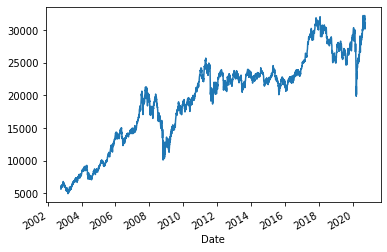

In [14]:
fdr.DataReader('KR3YT=RR','2020-01-01','2020-02-01').head(1).loc[:,'Close'].values
df_cost = fdr.DataReader('069500','2000')
df_cost['Close'].plot()